 # Group Project - Predict a movie's rating


**Dataset:** https://www.kaggle.com/tmdb/tmdb-movie-metadata
    
**Questions**

     1. How many movies are there in the dataset? And how many features?
     2. Are there variables that are not independent of each other?
     3. Which regression technique led to the best results?
     4. What are the factors that most contribute to the success of a film?
     5. Would you recommend your model to a film production company?  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.preprocessing import KBinsDiscretizer

import numpy as np

pd.options.mode.chained_assignment = None

seed = 42

In [2]:
df = pd.read_csv('data/tmdb_5000_movies.csv')

In [3]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
print(df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [5]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
data = df[['budget', 'original_language', 'popularity', 'genres', 'production_companies', 'release_date', 'revenue', 'runtime', 'vote_count', 'vote_average', 'keywords']]

In [7]:
# Visualização da nossa variável target
data['vote_average'].to_frame()

,vote_average
0,7.2
1,6.9
2,6.3
3,7.6
4,6.1
...,...
4798,6.6
4799,5.9
4800,7.0
4801,5.7


#### View `original_language`

In [8]:
data['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [9]:
data['genres'].unique()

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]',
       '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]',
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]'],
      dtype=object)

**Note:** The group found it interesting to work with the `genres` and `production_companies` variables, for that purpose the necessary information was extracted from these variables that were written in json.

# Transformation of variables

### a) Genres & Production Companies

In [10]:
data["genres"][500]

'[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 53, "name": "Thriller"}]'

In [11]:
data["production_companies"][500]

'[{"name": "Mikona Productions GmbH & Co. KG", "id": 24}, {"name": "Universal Pictures", "id": 33}, {"name": "Original Film", "id": 333}, {"name": "Ardustry Entertainment", "id": 26281}]'

In [12]:
# Para criar uma lista com todos os ´values´ da key 'name' (ou seja, no caso de aplicado à variável genre, vai devolver uma lista de todos os generos para cada observação).

def converter(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [13]:
data['genres_1'] = data['genres'].apply(converter)
data['production_companies_1'] = data['production_companies'].apply(converter)

In [14]:
# To create MultiLabelBinarizer object

mlb = MultiLabelBinarizer()

# fit and transform genres_1 
ohe_df = pd.DataFrame(mlb.fit_transform(data['genres_1']), columns=mlb.classes_)

# concatenate the OHE dataframe with the original dataframe
data = pd.concat([data, ohe_df], axis=1)

In [15]:
data.head(2)

,budget,original_language,popularity,genres,production_companies,release_date,revenue,runtime,vote_count,vote_average,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,en,150.437577,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,11800,7.2,...,0,0,0,0,0,1,0,0,0,0
1,300000000,en,139.082615,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,4500,6.9,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Function that returns the number of `names` (when applied to the genre variable, if we have 4 different genres in a given observation, it will return 4)

def n_lista(lista):
    return len(lista)

In [17]:
data["n_genres"] =  data['genres_1'].apply(n_lista)
data["n_production_companies"] =  data['production_companies_1'].apply(n_lista)

In [18]:
data.columns

Index(['budget', 'original_language', 'popularity', 'genres',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'vote_count', 'vote_average', 'keywords', 'genres_1',
       'production_companies_1', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'n_genres',
       'n_production_companies'],
      dtype='object')

**Note:** Here what the group did was create a variable with the number of different genres for each observation (film) in our dataset, and another variable with the number of companies involved in each observation (film) in our dataset . The idea is to try to understand if one or both variables have some predictive power in our model (thus improving its accuracy).

In [19]:
# Eliminamos as originais que nos levaram à criação das novas variáveis

data.drop('genres_1', axis=1, inplace = True)
data.drop('genres', axis=1, inplace = True)
data.drop('production_companies', axis=1, inplace = True)
data.drop('production_companies_1', axis=1, inplace = True)

### b) `release_date` to `year_released` 

In [20]:
data["release_date"] = data["release_date"].dropna()
data["year_released"] = data["release_date"].astype("string").str[:4]
data["year_released"] = pd.to_numeric(data["year_released"], errors="coerce").fillna(0).astype(int)

In [21]:
data["year_released"].value_counts()

2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
0         1
1932      1
1916      1
1934      1
1925      1
Name: year_released, Length: 91, dtype: int64

In [22]:
data.drop(data[data['year_released'] == 0].index, inplace=True)

In [23]:
data["year_released"].value_counts()

2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
1935      1
1932      1
1916      1
1934      1
1925      1
Name: year_released, Length: 90, dtype: int64

In [24]:
# To delete `release_date`, we no longer need it

data.drop('release_date', axis=1, inplace = True)

### c) `is_english`

In [25]:
data.head(2)

,budget,original_language,popularity,revenue,runtime,vote_count,vote_average,keywords,Action,Adventure,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,n_genres,n_production_companies,year_released
0,237000000,en,150.437577,2787965087,162.0,11800,7.2,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",1,1,...,0,0,1,0,0,0,0,4,4,2009
1,300000000,en,139.082615,961000000,169.0,4500,6.9,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",1,1,...,0,0,0,0,0,0,0,3,3,2007


In [26]:
data['is_english'] = data['original_language'] == 'en'
data['is_english'] = data['is_english'].astype(int)
data['is_english']

0       1
1       1
2       1
3       1
4       1
       ..
4798    0
4799    1
4800    1
4801    1
4802    1
Name: is_english, Length: 4802, dtype: int64

In [27]:
# Drop `original_language`

data.drop('original_language', axis=1, inplace=True)

### d) `Keywords`

In [28]:
data['keywords'].to_frame()

,keywords
0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
...,...
4798,"[{""id"": 5616, ""name"": ""united states\u2013mexi..."
4799,[]
4800,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam..."
4801,[]


In [29]:
data['keywords_1'] = data['keywords'].apply(converter)
data["n_keywords"] =  data['keywords_1'].apply(n_lista)
data.drop('keywords', axis=1, inplace = True)
data.drop('keywords_1', axis=1, inplace = True)

### e) Target - `vote_average` 

<AxesSubplot:ylabel='Frequency'>

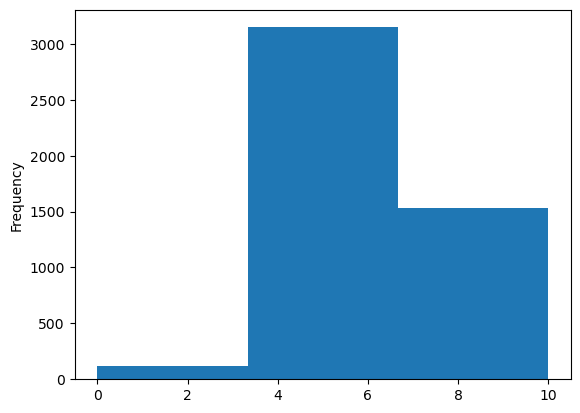

In [30]:
data['vote_average'].plot.hist(bins=3)

In [31]:
data['vote_average_target'] = data['vote_average']

In [32]:
data.drop('vote_average', axis=1, inplace = True)

# 1. How many movies are there in the dataset? And how many features?

In [33]:
print('Initial dataset:', df.shape)
print('Selected dataset (after feature selection):', data.shape)

Initial dataset: (4803, 20)
Selected dataset (after feature selection): (4802, 31)


In [34]:
data.isnull().sum()

budget                    0
popularity                0
revenue                   0
runtime                   2
vote_count                0
Action                    0
Adventure                 0
Animation                 0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Family                    0
Fantasy                   0
Foreign                   0
History                   0
Horror                    0
Music                     0
Mystery                   0
Romance                   0
Science Fiction           0
TV Movie                  0
Thriller                  0
War                       0
Western                   0
n_genres                  0
n_production_companies    0
year_released             0
is_english                0
n_keywords                0
vote_average_target       0
dtype: int64

As we can see above, in our initial dataset, the one given to us by the teacher has 4803 movies (4803 observations), and 20 features. After having carried out the feature selection, that is, selecting the variables with which we want to work, we were left with a dataset with 4803 films, and 9 features.

- We have a variable with missing values - `runtime`, for this variable the observations (2) with missing values will be removed.

<AxesSubplot:xlabel='runtime', ylabel='vote_average'>

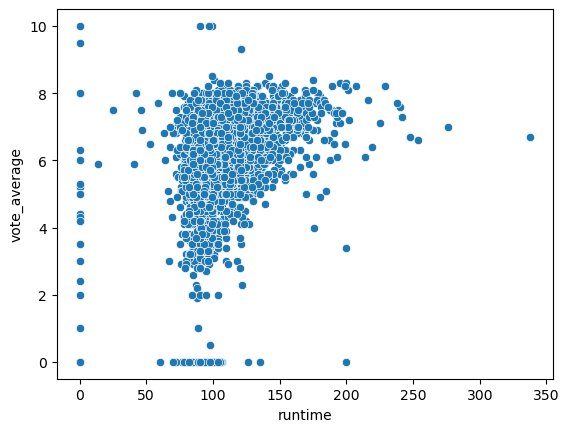

In [35]:
sns.scatterplot(x = 'runtime', y = 'vote_average', data = df)

## 1.1. Handle `runtime` missing values

**Technique:** Drop NaN

In [36]:
data.dropna(subset=['runtime'], axis=0, inplace=True)

In [37]:
data['runtime'].isnull().sum()

0

# 2. Are there variables that are not independent of each other?

In [38]:
# Check the variables in our dataset

data.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'n_genres', 'n_production_companies', 'year_released', 'is_english',
       'n_keywords', 'vote_average_target'],
      dtype='object')

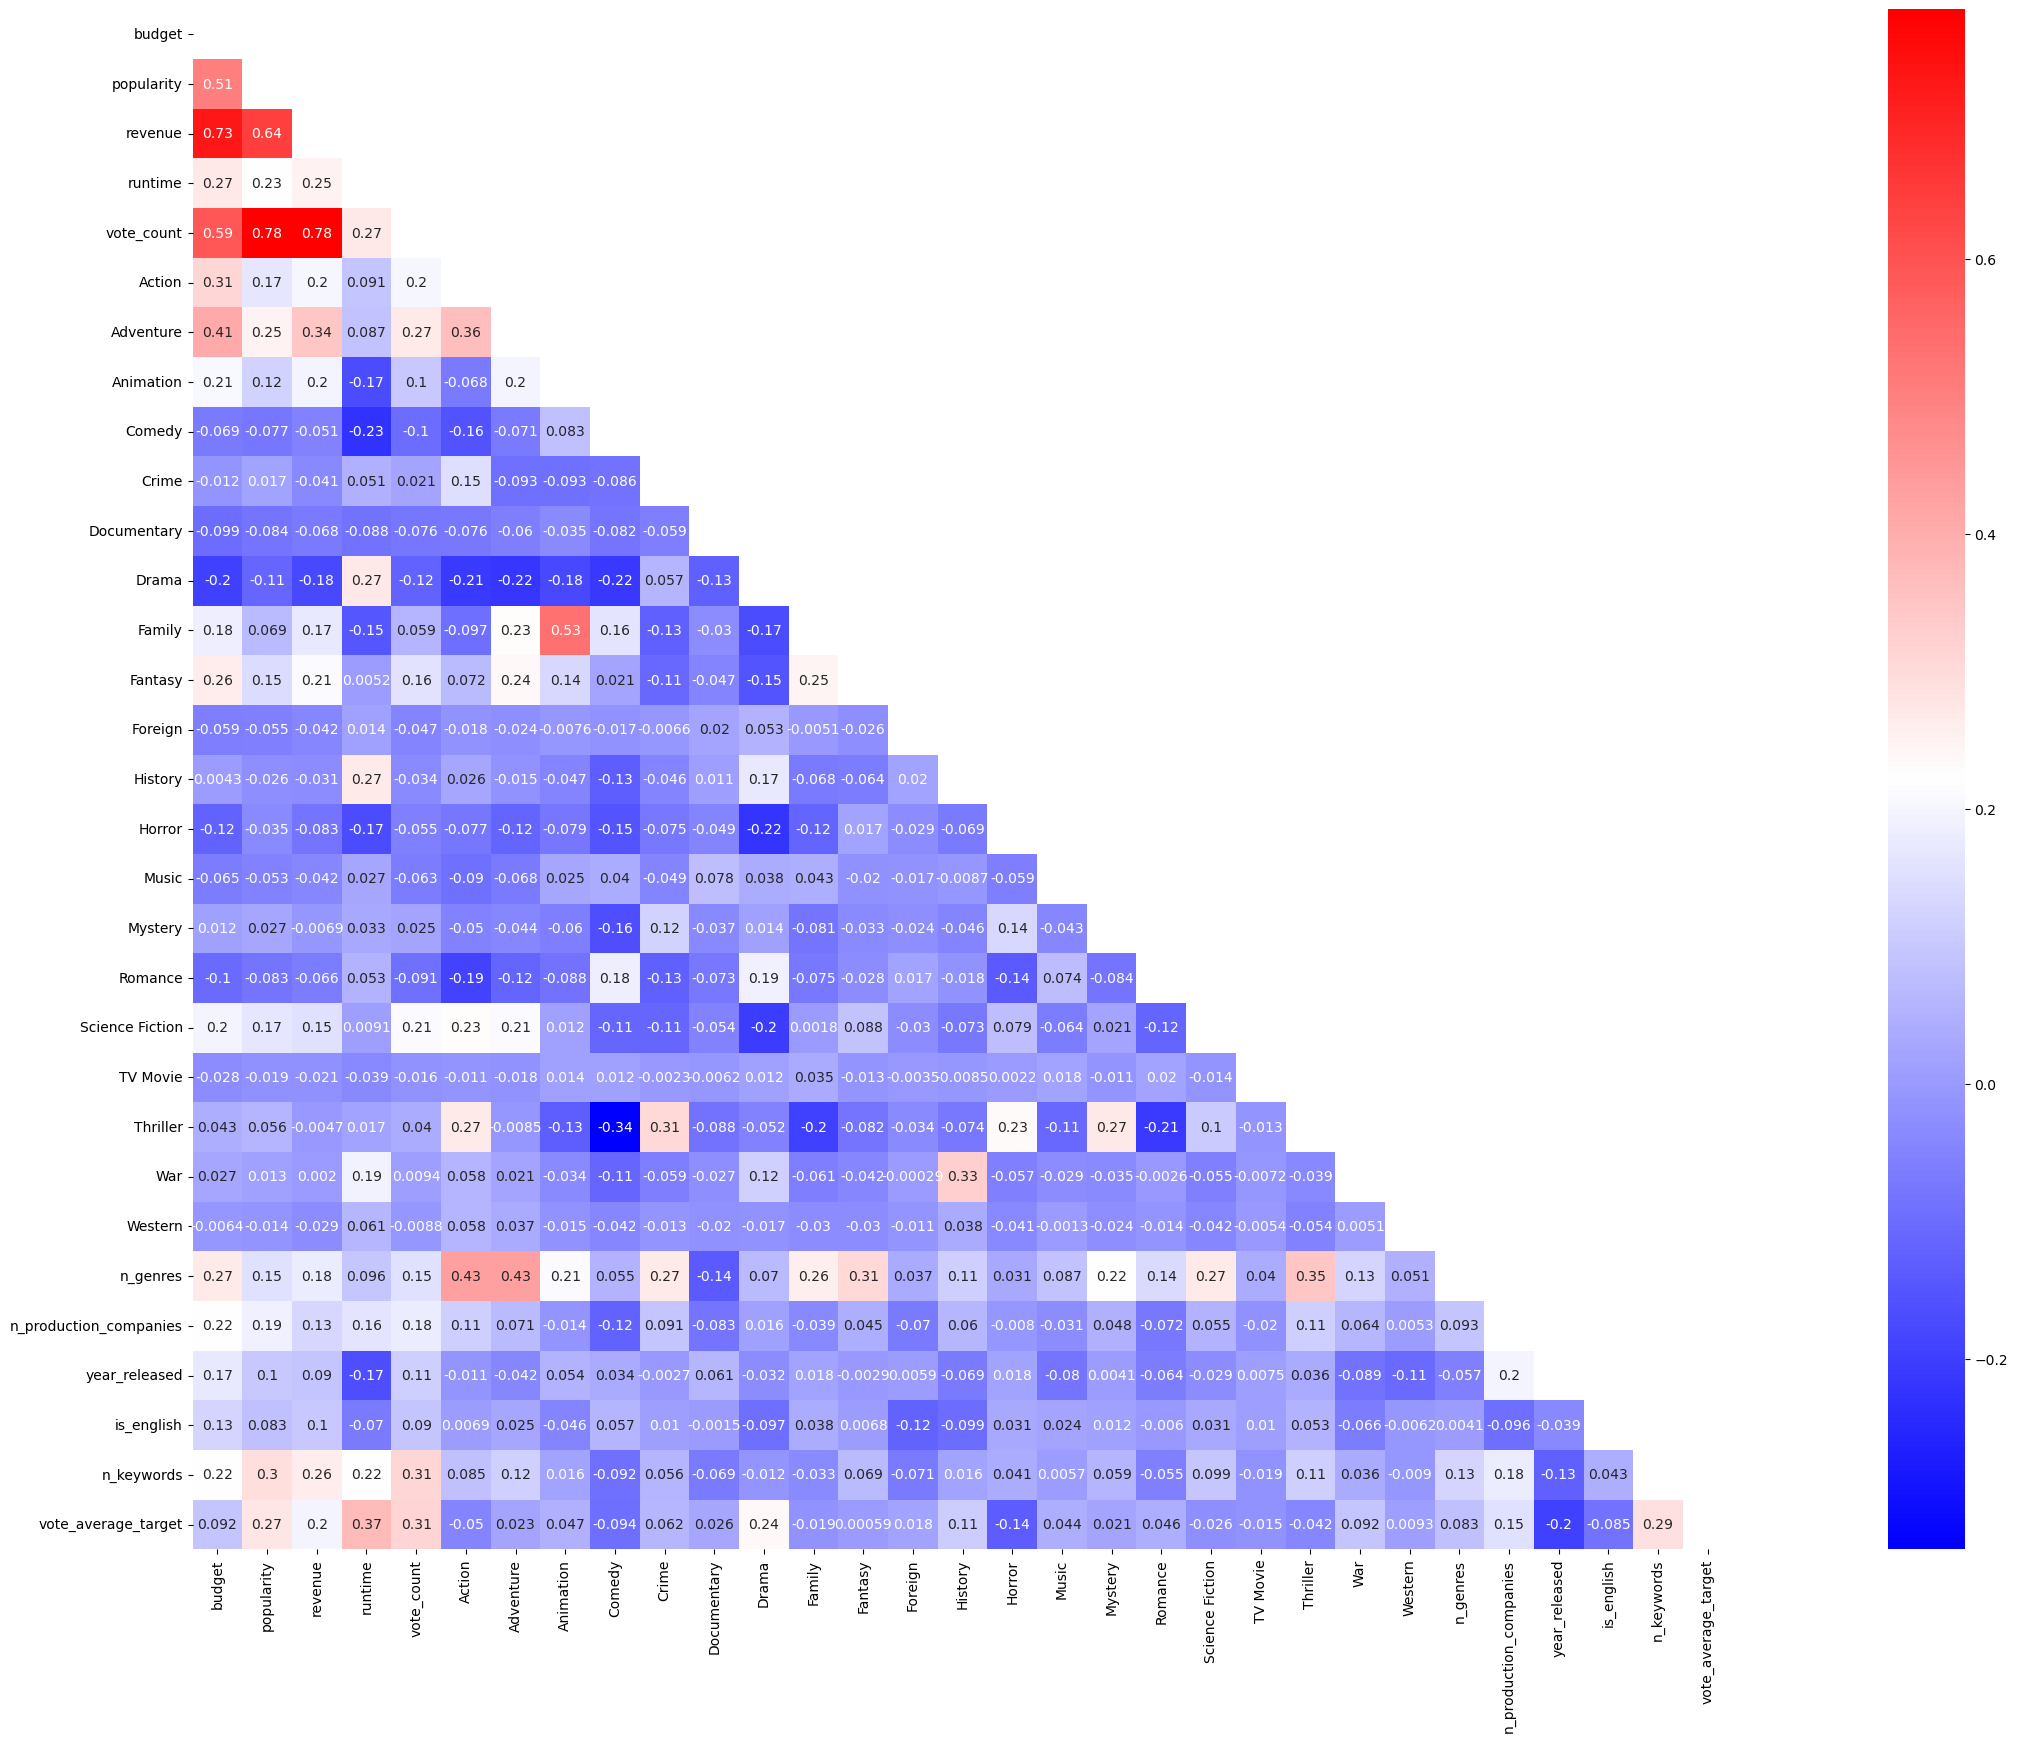

In [39]:
# Let's first visualize the movie genre variables, because there are many, so first let's visualize their correlation, choose those with a low correlation between them and a stronger correlation with the target.

fig = plt.figure(figsize = (40, 20))
sns.heatmap(data.corr(), 
            cmap='bwr',
            square=True, 
            annot = True,
            mask=np.triu(data.corr().notnull().round(2))
           );

In [40]:
for col in data.columns:
    
    corr_pearson = stats.pearsonr(data[col], data['vote_average_target'])
    
    print(f'{col} -- > {corr_pearson}')

budget -- > PearsonRResult(statistic=0.0922244652626006, pvalue=1.538778528502586e-10)
popularity -- > PearsonRResult(statistic=0.27421224612916106, pvalue=1.5119212506921508e-83)
revenue -- > PearsonRResult(statistic=0.19729110188821125, pvalue=2.5125401788974747e-43)
runtime -- > PearsonRResult(statistic=0.37188792563872364, pvalue=2.5640086655146386e-157)
vote_count -- > PearsonRResult(statistic=0.31369277133643547, pvalue=4.3527677800124215e-110)
Action -- > PearsonRResult(statistic=-0.049687323437694594, pvalue=0.0005738773844759271)
Adventure -- > PearsonRResult(statistic=0.023347591957587212, pvalue=0.10579891687538806)
Animation -- > PearsonRResult(statistic=0.04705682268746483, pvalue=0.0011096143194630028)
Comedy -- > PearsonRResult(statistic=-0.09371083055197652, pvalue=7.763947217223123e-11)
Crime -- > PearsonRResult(statistic=0.06227228106694213, pvalue=1.578658121255718e-05)
Documentary -- > PearsonRResult(statistic=0.025779432673797543, pvalue=0.07411818919777383)
Drama 

- As we can see above, the `budget` variable has a strong correlation with the `revenue` variable (0.73);

- `revenue` is strongly correlated with the `popularity` variable (0.64) - for this reason we will drop the `revenue` variable.

- Also the variable `populariy` is strongly correlated with the variable `vote_count` (0.78), for this reason it will also be eliminated.

- Finally, we `drop` the `n_genres` variable, due to its weak correlation with the target variable, and due to its relationship with the dummys related to the Genre.

- Although some dummy variables related to the film's genre are not correlated with the target variable (p-value>0.05), it was decided not to eliminate them since they provided important information to the forecast models.

In [41]:
data.drop(columns = ['revenue', 'popularity', 'n_genres'], axis=1, inplace = True)

- We eliminated the `vote_count` variable due to the information it was giving to the target variable (vote_average)

In [42]:
data.drop("vote_count", axis=1, inplace=True)

### Split dataset into training and test

In [43]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average_target'], axis = 1)
y_train = train_set['vote_average_target']

X_test = test_set.drop(['vote_average_target'], axis = 1)
y_test = test_set['vote_average_target']

# 3. Which regression technique led to the best results?

In [44]:
print(data.columns)

Index(['budget', 'runtime', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'n_production_companies',
       'year_released', 'is_english', 'n_keywords', 'vote_average_target'],
      dtype='object')


In [45]:
def adjusted_r2(r2, X):

  return (1 - ((1 - r2)* (X.shape[0] - 1)/(X.shape[0] - X.shape[1] - 1)))

### 3.1. LINEAR REGRESSION

In [46]:
# Fit linear regression model
lr = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_preds = lr.predict(X_test)

# Evaluate the model
r2_score = r2_score(y_test, y_preds)
print("R^2 score:", r2_score)

R^2 score: 0.30947230332569486


In [47]:
adjusted_r2(r2_score, X_train)

0.3047637483523059

In [48]:
residuals = y_preds - y_test

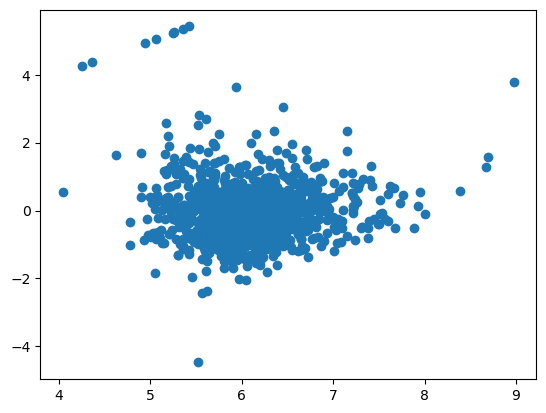

In [49]:
plt.scatter(y_preds, residuals)

### 3.2. NON-LINEAR REGRESSION

### 3.2.1. POLYNOMIAL REGRESSION

In [50]:
from sklearn.metrics import r2_score

In [51]:
poly = PolynomialFeatures(degree=2)

In [52]:
X_train_transformed = poly.fit_transform(X_train)

X_test_transformed = poly.fit_transform(X_test)

In [53]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = poly.get_feature_names_out(X_train.columns))

In [54]:
lr = LinearRegression().fit(X_train_transformed, y_train)

In [55]:
y_preds = lr.predict(X_test_transformed)

/Users/meganejunqueira/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
r2 = r2_score(y_test, y_preds)
r2

0.20155710836354146

In [57]:
residuals = y_preds - y_test

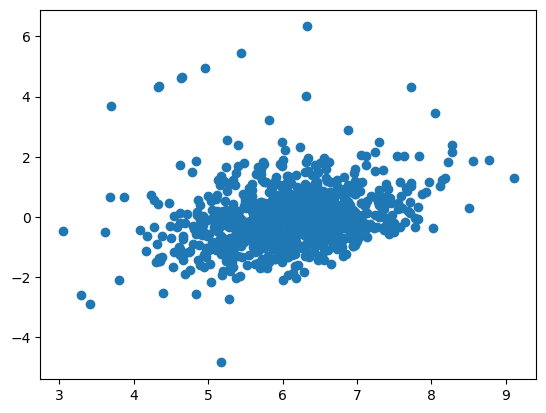

In [58]:
plt.scatter(y_preds, residuals)

### 3.2.2. RANDOM FOREST REGRESSION

In [59]:
from sklearn.metrics import r2_score

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [61]:
rf = RandomForestRegressor(n_estimators=100, random_state=seed)

rf.fit(X_train, y_train)
 
# Fazer as predições do modelo no conjunto de teste
y_pred = rf.predict(X_test)
 
# Calcular o R² score do modelo
r2 = r2_score(y_test, y_pred)
 
print("R^2 score:", r2)

R^2 score: 0.26302831066430354


In [62]:
residuals = y_preds - y_test

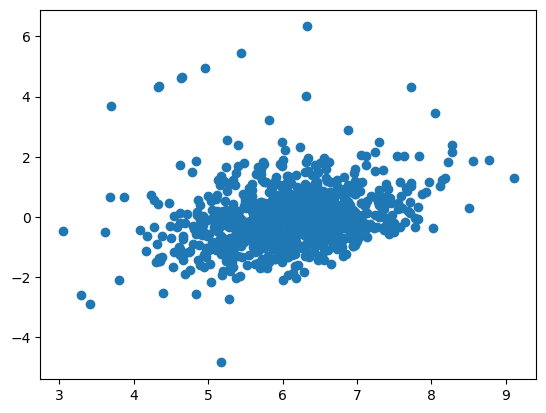

In [63]:
plt.scatter(y_preds, residuals)

- The Regression that led to the best results was the Linear Regression.

# 4. What are the factors that most contribute to the success of a film?

- Factors with **Linear Regression**, the one that obtained the best R^2

In [64]:
lr = LinearRegression().fit(X_train, y_train)

In [65]:
coefficients = lr.coef_

In [66]:
coefficients

array([ 7.97039252e-10,  1.29768632e-02, -1.33605510e-01, -6.24685185e-03,
        7.85814791e-01,  1.04887481e-01,  1.38181147e-01,  7.88784730e-01,
        4.24363456e-01, -9.13974129e-02,  8.38082329e-03,  3.08330686e-01,
       -6.38727799e-03, -1.29962008e-01,  6.43840238e-02,  7.32730331e-02,
        5.78113924e-02,  4.06010528e-02, -2.19126737e-02, -4.01113760e-02,
       -3.27731376e-02, -4.19661780e-02,  5.95529245e-02, -1.71902672e-02,
       -2.53917780e-01,  3.81116459e-02])

In [67]:
X_train.columns

Index(['budget', 'runtime', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'n_production_companies',
       'year_released', 'is_english', 'n_keywords'],
      dtype='object')

In [68]:
coefficients = pd.DataFrame({'Columns': X_train.columns, 'Coefficient': lr.coef_})

In [69]:
coefficients.sort_values('Coefficient', ascending=False)

,Columns,Coefficient
7,Documentary,7.887847e-01
4,Animation,7.858148e-01
8,Drama,4.243635e-01
11,Foreign,3.083307e-01
6,Crime,1.381811e-01
5,Comedy,1.048875e-01
15,Mystery,7.327303e-02
14,Music,6.438402e-02
22,n_production_companies,5.955292e-02
16,Romance,5.781139e-02


- The variables that most contribute to the model are 8 variables related to the genre of the film, followed by n_production_companies.

# 5. Would you recommend your model to a film production company?

Yes, although our model's R^2 is only **0.30,** it's better than the baseline. However, this means that the explanatory variables we used only explain 30% of the Target's variability.